<a href="https://colab.research.google.com/github/GVSU-CIS635/projects-outliers/blob/prophet-model/prophet_model_(first_draft).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Prophet

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from prophet import Prophet

from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [4]:
url = "streamflow_filled_ARIMA.csv"
df = pd.read_csv(url)

In [5]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date").sort_index()
df = df[["Q (m3/s)"]].rename(columns={"Q (m3/s)": "Q_m3_s"})
print(df.head(), df.shape)

            Q_m3_s
Date              
1967-01-01  2690.0
1967-01-02  2650.0
1967-01-03  2650.0
1967-01-04  2610.0
1967-01-05  2570.0 (18628, 1)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18628 entries, 1967-01-01 to 2017-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q_m3_s  18628 non-null  float64
dtypes: float64(1)
memory usage: 291.1 KB


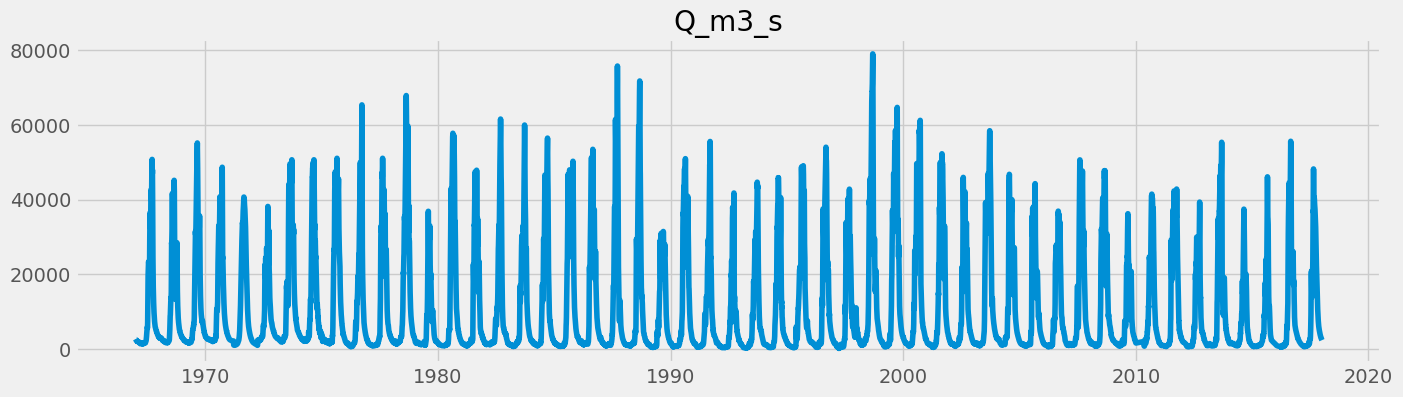

In [6]:
df.info()

plt.figure(figsize=(15,4))
plt.plot(df.index, df["Q_m3_s"])
plt.title("Q_m3_s")
plt.show()

In [7]:
test_h = 730
dftrain = df.iloc[:-test_h]
dftest = df.iloc[-test_h:]

In [8]:
dftrain = dftrain.reset_index() \
    .rename(columns={'Date':'ds',
                     'Q_m3_s':'y'})

In [9]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      17898 non-null  datetime64[ns]
 1   y       17898 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 279.8 KB


In [10]:
model = Prophet()
model.fit(dftrain)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1tylpfbq/wun009qj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1tylpfbq/klhcohdg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26959', 'data', 'file=/tmp/tmp1tylpfbq/wun009qj.json', 'init=/tmp/tmp1tylpfbq/klhcohdg.json', 'output', 'file=/tmp/tmp1tylpfbq/prophet_modelw0226626/prophet_model-20251116190741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:07:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:07:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [11]:
dftest = dftest.reset_index() \
    .rename(columns={'Date':'ds',
                     'Q_m3_s':'y'})

In [12]:
test_forecast = model.predict(dftest)

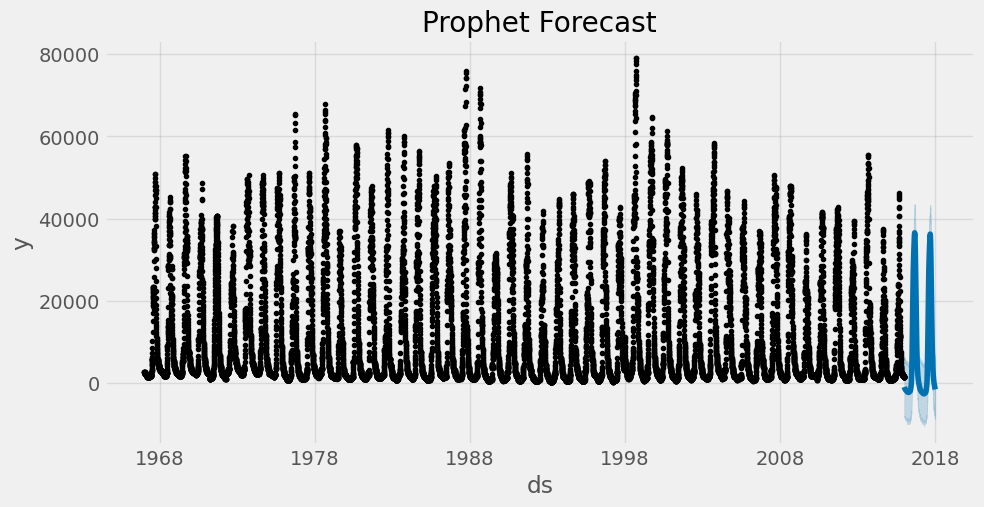

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(test_forecast, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

In [19]:
np.sqrt(mean_squared_error(y_true=dftest['y'],
                   y_pred=test_forecast['yhat']))

np.float64(5039.412853362519)

In [20]:
mean_absolute_error(y_true=dftest['y'],
                   y_pred=test_forecast['yhat'])

4091.6722034015247

In [21]:
mean_absolute_percentage_error(y_true=dftest['y'],
                   y_pred=test_forecast['yhat'])

np.float64(177.73883963039165)